# Визуализация данных с Matplotlib

###Дружинина Анжелика


## Часть 1: предварительная обработка датафрейма

### Информация о данных

Используем данные с результатами опроса преподавателей двух каталонских универсистетов (Открытый университет Каталонии и университет Помпеу Фабра), посвященного использованию Википедии в методических и академических целях.

* Оригинальное описание на платформе data.world: [ссылка](https://data.world/uci/wiki4he).

### Загрузка данных 

Импортируем библиотеку `pandas` :

In [ ]:
import pandas as pd

Загрузим данные из файла `"wiki.csv"` и сохраним их в датафрейм `wiki`, сообщив Python, что в качестве разделителя столбцов используется точка с запятой:

In [ ]:
wiki = pd.read_csv("wiki.csv", sep = ";") 

In [ ]:
wiki.info() # для компактности конспекта ячейка не запущена

Итак, датафрейм довольно большой: 913 наблюдений (строк) и 53 переменных (столбцов). Какие-то столбцы содержат целые числа (`int` от `integer`), какие-то – текст (`object`, он же `string` за рамками `pandas`). 


### Выбор столбцов и строк

Датафрейм большой, давайте отберем из него только те столбцы, которые нам понадобятся. Выберем столбец со значениями возраста сотрудников университетов:

In [ ]:
wiki["AGE"] 

0      40
1      42
2      37
3      40
4      51
       ..
908    43
909    53
910    39
911    40
912    41
Name: AGE, Length: 913, dtype: int64

Теперь выберем несколько столбцов – перечислим их названия в виде списка и сохраним их в датафрейм `small`:

In [ ]:
small = wiki[["AGE", "GENDER", "YEARSEXP", "UNIVERSITY", 
              "UOC_POSITION", "Qu3"]]  

Скопируем названия столбцов переписывать, из перечня названий, который хранится в атрибуте `.columns`:

In [ ]:
wiki.columns

Index(['AGE', 'GENDER', 'DOMAIN', 'PhD', 'YEARSEXP', 'UNIVERSITY',
       'UOC_POSITION', 'OTHER_POSITION', 'OTHERSTATUS', 'USERWIKI', 'PU1',
       'PU2', 'PU3', 'PEU1', 'PEU2', 'PEU3', 'ENJ1', 'ENJ2', 'Qu1', 'Qu2',
       'Qu3', 'Qu4', 'Qu5', 'Vis1', 'Vis2', 'Vis3', 'Im1', 'Im2', 'Im3', 'SA1',
       'SA2', 'SA3', 'Use1', 'Use2', 'Use3', 'Use4', 'Use5', 'Pf1', 'Pf2',
       'Pf3', 'JR1', 'JR2', 'BI1', 'BI2', 'Inc1', 'Inc2', 'Inc3', 'Inc4',
       'Exp1', 'Exp2', 'Exp3', 'Exp4', 'Exp5'],
      dtype='object')

Теперь займемся строками. Оставим в датафрейме `small` только строки, соответствующие сотрудникам Открытого университета Каталонии (закодированы значением 1 в столбце `UNIVERSITY`):

In [ ]:
small = small[small["UNIVERSITY"] == 1]

In [ ]:
small["UNIVERSITY"] == 1

0      True
1      True
2      True
3      True
4      True
       ... 
795    True
796    True
797    True
798    True
799    True
Name: UNIVERSITY, Length: 800, dtype: bool

Строка кода в предыдущей ячейке отбирает те строки из `small`, где выражение в квадратных скобках вернуло `True`. 

Теперь отберем только сотрудников, имеющих должность *lecturer* или *assistant* (метки  "3" или "4") и сохраним их в датафрейм `tiny`. Для этого нам понадобится оператор `|`, соответствующий объединению условий через ИЛИ (хотя бы одно из условий верно):

In [ ]:
tiny = small[(small["UOC_POSITION"] == '3') | 
             (small["UOC_POSITION"] == '4')]

Удалим из `tiny` столбец с названием университета (у нас сотрудники только одного, у всех одно и то же значение) и столбец с должностями сотрудников. Для этого воспользуемся методом `.drop()`.

In [ ]:
tiny = tiny.drop(columns = ["UNIVERSITY", "UOC_POSITION"])

Метод `.drop()` по умолчанию работает со строками, поэтому в скобках мы указываем, что удалять нужно все-таки столбцы, а затем перечисляем их названия в виде списка. Этот метод не вносит изменения в датафрейм, он возвращает его измененную копию. Сохраняем эту копию с тем же названием `tiny`.

## Часть 2: описание данных

Посмотрим теперь на более содержательное описание данных. Запросим описательные статистики через метод `.describe()`:

In [ ]:
tiny.describe() 

,AGE,GENDER
count,68.000000,68.000000
mean,40.382353,0.544118
std,6.376331,0.501753
min,29.000000,0.000000
25%,35.000000,0.000000
50%,40.000000,1.000000
75%,45.250000,1.000000
max,56.000000,1.000000


Метод `.describe()` по умолчанию выводит описательные статистики только для числовых столбцов (типы `integer` и `float`). Для столбца `AGE` все полученные значения имеют понятный смысл: 

* `count`: число заполненных ячеек 68;
* `mean` : средний возраст сотрудников примерно 40 лет;
* `std` : стандартное отклонение возраста примерно 6 лет;
* `50%`: возраст половины сотрудников также не превышает 40 лет (медиана); 
* `25%`: 25% сотрудников не старше 35 лет (нижний квартиль);
* `75%`: 75% сотрудников не старше 45 лет (верхний квартиль);
* `min` и `max`: самому молодому сотруднику 29 лет, самому пожилому – 56.

Для столбца `GENDER` не все статистики стоит внимательно изучать, все-таки пол – показатель качественный, но на среднее стоит посмотреть – это просто доля «единиц» в нашей выборке, то есть доля мужчин среди опрошенных (примерно 54%).

Если мы хотим получить описание текстовых столбцов (если все нормально с типами данных, это показатели в качественной или порядковой шкале), в `.describe()` можно добавить опцию `include` и указать соответствующий тип:

In [ ]:
tiny.describe(include = "object")

,YEARSEXP,Qu3
count,68,68
unique,20,6
top,12,3
freq,8,32


Посмотрим на `Qu3`. В строке `unique` сохранено число уникальных значений, здесь из 6 (согласие/несогласие с утверждением по шкале Лайкерта и значение для кодирования пропусков). В строке `top` хранится мода, самое частое значение, здесь это 3 (*Neither disagree nor agree*, что ожидаемо). В строке `freq` находится частота, соответствующая моде, в данном случае ответ 3 выбрали 32 человека. 

Теперь посмотрим, что не так с `YEARSEXP`. Выведем уникальные значения:

In [ ]:
tiny["YEARSEXP"].unique() 

array(['13', '8', '17', '11', '12', '25', '10', '9', '5', '?', '18', '15',
       '19', '4', '7', '20', '3', '16', '6', '2'], dtype=object)

Проблема в знаке вопроса – так в этих данных были закодированы пропущенные ответы. Выкинем строки с пропущенными ответами – выберем только те строки, где значение в столбце `YEARSEXP` не `?`:

In [ ]:
tiny = tiny[tiny["YEARSEXP"] != "?"] 

Проверим:

In [ ]:
tiny["YEARSEXP"].unique() 

array(['13', '8', '17', '11', '12', '25', '10', '9', '5', '18', '15',
       '19', '4', '7', '20', '3', '16', '6', '2'], dtype=object)

Лишнее выкинулось, но проблема осталась. Значения по-прежнему текстовые. Воспользуемся
 методом `.astype()`, он умеет изменять тип сразу всех элементов массива или столбца:

In [ ]:
tiny["YEARSEXP"] = tiny["YEARSEXP"].astype(int) # переделываем в integer

Выведем описательные статистики по группам. Сгруппируем всех респондентов в `tiny` по полу и выведем среднее значение для числовых столбцов. Для этого воспользуемся методом `.groupby()` для группировки и методом `.agg()` для агрегирования (внутри указываем, какую функцию для каждой группы применить – здесь функцию для вычисления среднего):

In [ ]:
tiny.groupby("GENDER").agg("mean")

,AGE,YEARSEXP
GENDER,,
0,41.689655,11.310345
1,39.222222,10.333333


Итак, видно, что средние значения возраста сотрудников мужского и женского пола отличаются несильно. То же верно и для числа лет опыта работы. Посмотрим на медианные значения по группам:

In [ ]:
tiny.groupby("GENDER").agg("median")

,AGE,YEARSEXP
GENDER,,
0,41,10
1,40,11


Примерно та же история. Чисто технически, метод `.agg()` можно было опустить и написать код проще:

In [ ]:
tiny.groupby("GENDER").median()

,AGE,YEARSEXP
GENDER,,
0,41,10
1,40,11


Но этот метод все-таки более универсальный, он позволяет выводить сразу несколько характеристик для каждой группы. В таком случае соответствующие функции нужно записывать в виде списка:

In [ ]:
tiny.groupby("GENDER").agg(["mean", "std"]) 

AGE             YEARSEXP          
             mean       std       mean       std
GENDER                                          
0       41.689655  6.724706  11.310345  4.575583
1       39.222222  5.836394  10.333333  5.466783

Итак, мы вывели среднее и стандартное отклонение – распространенные характеристики выборок.

## Часть 3: визуализация

Для создания разных типов графиков нам понадобится библиотека `matplotlib`, а точнее, основной ее модуль, под названием `pyplot`. 

In [ ]:
from matplotlib import pyplot as plt

### Гистограмма

Начнем визуализацую с гистограммы.

Для начала построим самую простую гистограмму для визуализации распределения возраста. Для этого из модуля `plt` вызовем функцию `.hist()`. Изменим цвет заливки (`color`) и добавим цвет границ столбцов (`edgecolor`). Также поделим гистограмму на 8 столбцов.


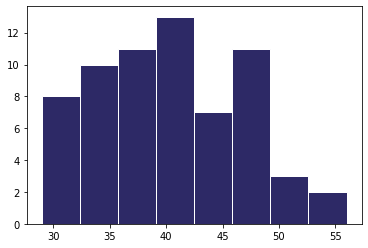

In [ ]:
plt.hist(tiny["AGE"], color = "#2d2966", edgecolor = "white", bins = 8);

Проинтерпретируем полученный график. Распределение возраста сотрудников университета в должности преподавателя или ассистента немного скошено вправо, значения выше 50 лет являются не совсем типичными. Возраст большинства преподавателей и ассистентов находится на интервале от 40 до 42 лет.

## Диаграмма рассеивания

Построим диаграмму рассеивания, которая покажет нам связь между двумя количественными показателями — возрастом и числом лет опыта работы. Для построения такой диаграммы используется простая функция `plot()`, но нужно добавить аргумент, который будет соответствовать только точкам:


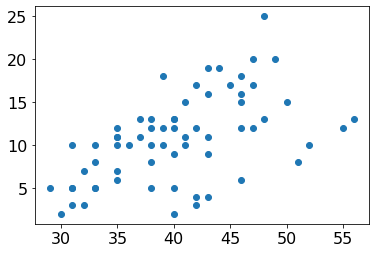

In [ ]:
plt.plot(tiny["AGE"], tiny["YEARSEXP"], 'o')

Построим более красивый график (скорректируем размер, цвет, добавим подписи и сетку):

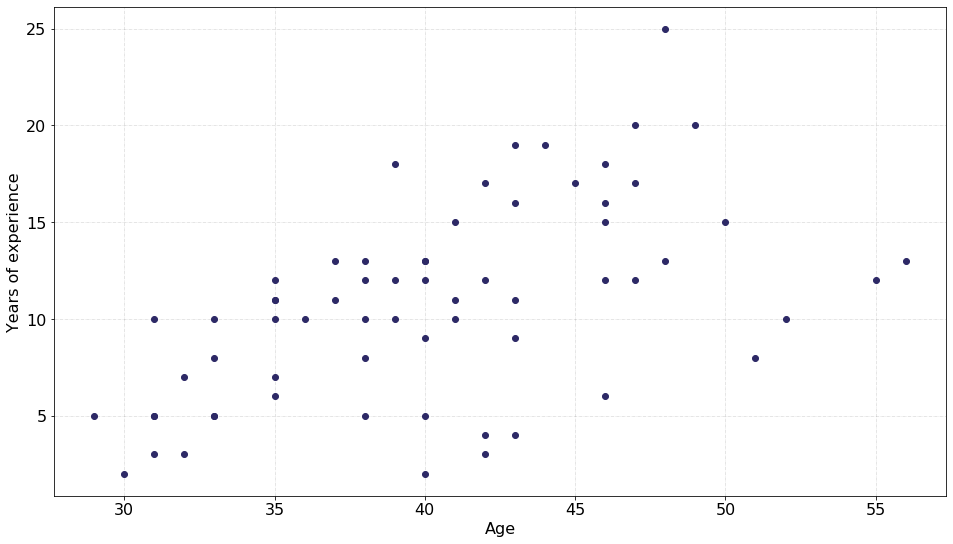

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9))

plt.plot(tiny["AGE"], tiny["YEARSEXP"], 'o', color = "#2d2966")
ax.set_xlabel("Age")
ax.set_ylabel("Years of experience")

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)

Итак, судя по графику, связь между показателями есть, и она положительна. У более старших сотрудников число лет опыта работы больше (что вполне логично).

## Матрица диаграмм рассеивания

Построим другой график — матрицу диаграмм рассеивания. 
Для этого нам понадобится функция `scatter_matrix()` из модуля для графики `plotting` внутри библиотеки `pandas`. 

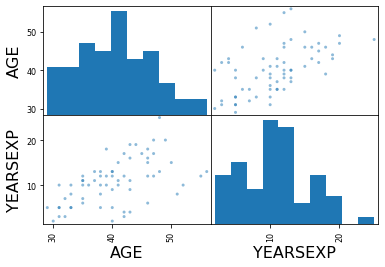

In [ ]:
# извлекаем столбцы AGE и YEARSEXP

pd.plotting.scatter_matrix(tiny[["AGE", "YEARSEXP"]]);

Этот график преставляет собой матрицу (сетку или таблицу), которая содержит симметричные диаграммы рассеивания (`AGE` на `YEARSEXP` в нижнем углу и `YEARSEXP` на `AGE` в верхнем углу) и гистограммы на главной диагонали. 

## Столбиковая диаграмма

Подготовим таблицу с частотами. Для этого можно воспользуемся методом `.value_counts()`. Выведем таблицу частот для столбца `Qu3`, степени согласия с утверждением *Articles in Wikipedia are comprehensive*:

In [ ]:
tiny["Qu3"].value_counts()

3    30
2    16
4    14
5     2
1     2
?     1
Name: Qu3, dtype: int64

Итак, в таблице записаны категории и соответствующие им частоты (30 ответов 3, 16 ответов 2, и так далее), причем категории упорядочены от самой частой до самой редкой.

Полученный результат – это объект типа `pandas.Series`, то есть просто столбец с данными, где у каждого значения есть индекс (номер). 

Сохраним полученную таблицу в переменную `tab` и извлечем из нее названия категорий и частоты:

In [ ]:
tab = tiny["Qu3"].value_counts()
vals = tab.index  # категории
freqs = tab.values  # частоты

In [ ]:
vals

Index(['3', '2', '4', '5', '1', '?'], dtype='object')

In [ ]:
freqs

array([30, 16, 14,  2,  2,  1])

Сейчас можно выбрать, какие значения располагать по горизонтальной и вертикальной осям. Для построения столбиковой диаграммы используем функцию `bar()`:

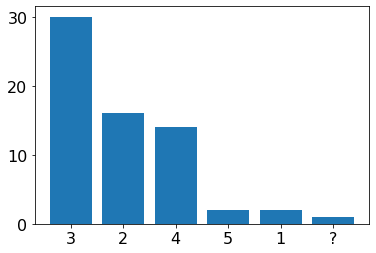

In [ ]:
plt.bar(vals, freqs);

Столбики упорядочены вполне разумным образом, от самого популярного ответа до наименее популярного. Оформим график.


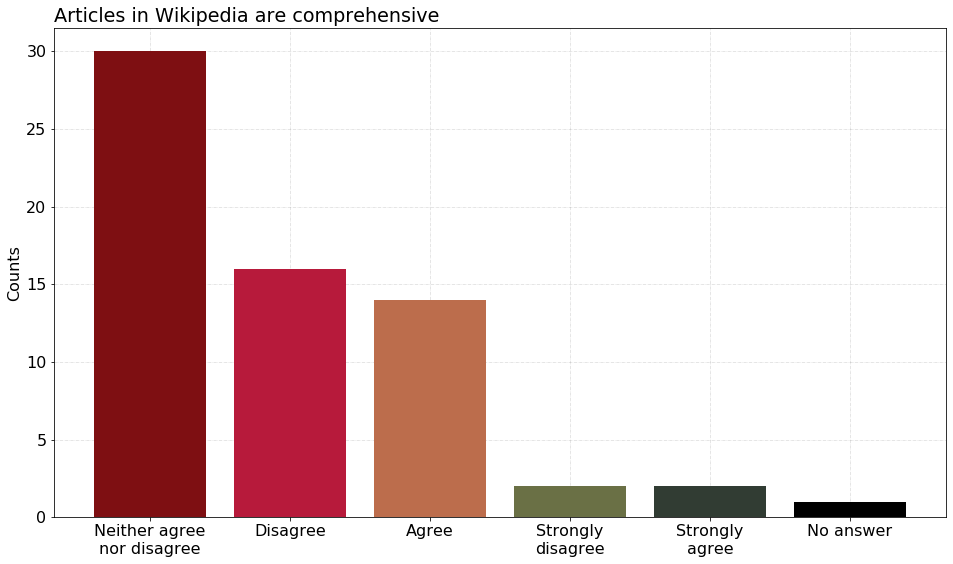

In [ ]:
fig, ax = plt.subplots(figsize =(16, 9)) 

ax.bar(vals, freqs, 
       color = ["#7e0f12", "#b71a3b", "#bc6d4c", 
                "#6a7045",  "#313c33", "black"],
      tick_label = ["Neither agree\nnor disagree", 
                    "Disagree", 
                    "Agree", 
                    "Strongly\ndisagree",
                    "Strongly\nagree", 
                    "No answer"])

# добавляем подписи

ax.set_title("Articles in Wikipedia are comprehensive", loc = 'left')
ax.set_ylabel("Counts")

# добавляем сетку

ax.set_axisbelow(True)
ax.grid(b = True, color ='grey', linestyle = '-.', 
        linewidth = 0.5, alpha = 0.4)